In [1]:
import numpy
import cv2
import math
from matplotlib import pyplot as plt

interpolationMethods = {
         0: cv2.INTER_NEAREST, 
         1: cv2.INTER_LINEAR, 
         2: cv2.INTER_CUBIC
}

def open_image(img):
    cv2.imshow('Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def rotate_img(img, angle):
    
    # get image size
    (height, width) = img.shape[:2]
    
    # get center coords
    (center_x, center_y) = (width // 2, height // 2)
    
    # normalize an input angle
    angle %=360
    
    # get sin and cos of an input angle
    cos = numpy.cos(angle)
    sin = numpy.sin(angle)
 
    # get opencv rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), angle, 1.0)
    
    # rotate image without borders (http://qaru.site/questions/121230/rotate-image-and-crop-out-black-borders)
    quadrant = int(math.floor(angle / (math.pi / 2))) & 3
    sign_alpha = angle if ((quadrant & 1) == 0) else math.pi - angle
    alpha = (sign_alpha % math.pi + math.pi) % math.pi

    ## calculate width and height after rotation
    new_width = width * math.cos(alpha) + height * math.sin(alpha)
    new_height = width * math.sin(alpha) + height * math.cos(alpha)

    gamma = math.atan2(new_width, new_width) if (width < height) else math.atan2(new_height, new_height)
    delta = math.pi - alpha - gamma

    length = max(width, height)
    y = (length * math.cos(alpha) * math.sin(alpha) / math.sin(delta)) * math.cos(gamma)
    x = y * math.tan(gamma)

    ## update width and height
    new_width = int(new_width - 2 * x)
    new_height = int(new_height - 2 * y)

    ## update rotation matrix
    rotation_matrix[0, 2] += (new_width / 2) - center_x
    rotation_matrix[1, 2] += (new_height / 2) - center_y
    
    ## apply affine transformation and return result
    img = cv2.warpAffine(img, rotation_matrix, (new_width, new_height))
    return img

Введите абсолютный путь до изображения: /Users/xtail/Projects/LETI/ImageProcessing/labs/lab1/test_files/2.jpg


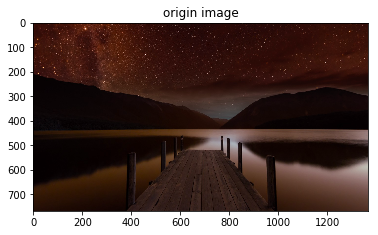

In [2]:
image_path = input("Введите абсолютный путь до изображения: ")
origin_img = cv2.imread(image_path)
plt.imshow(origin_img)
plt.title("origin image")
plt.show()

Введите угол поворота (в градусах): 45
Введите коэффициент сжатия из диапазона (0;1]: 0.5
Выберите признак интерполяционной схемы (0 – нулевого порядка, 1 – первого порядка, 2 - третьего порядка): 1


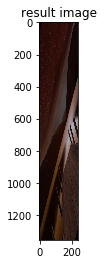

In [3]:
angle = int(input("Введите угол поворота (в градусах): "))
k = float(input("Введите коэффициент сжатия из диапазона (0;1]: "))
interpolation_type_index = int(input("Выберите признак интерполяционной схемы (0 – нулевого порядка, 1 – первого порядка, 2 - третьего порядка): "))
rotated_img = rotate_img(origin_img, angle)
result_img = cv2.resize(rotated_img, None, fx = k, fy = 1 / k, interpolation=interpolationMethods[interpolation_type_index])
cv2.imwrite("results/result.bmp", result_img);
#open_image(result_img)
plt.imshow(result_img)
plt.title("result image")
plt.show()